Starting SSD object detection using PyTorch...
airplane: 1.00
airplane: 0.73
airplane: 0.52


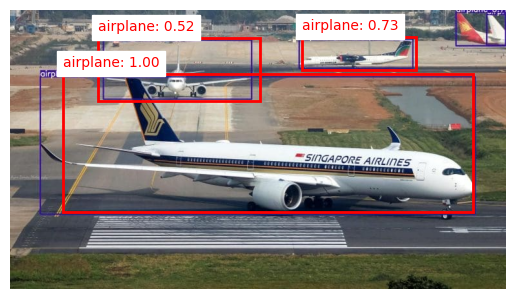

SSD detection complete.


In [ ]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. Start
print("Starting SSD object detection using PyTorch...")

# 2. Load pretrained SSD model (COCO-trained)
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()

# 3. Define COCO class names
coco_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# 4. Load an example image
image_path = '/content/airplane-detection-computer-vision-visoai-768x432.jpeg'  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# 5. Preprocess the image (convert to tensor)
image_tensor = torchvision.transforms.functional.to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

# 6. Inference (get predictions)
with torch.no_grad():
    output = model(image_tensor)

# 7. Extract predictions
boxes = output[0]['boxes'].detach().cpu().numpy()
scores = output[0]['scores'].detach().cpu().numpy()
labels = output[0]['labels'].detach().cpu().numpy()

# 8. Print and visualize results
for box, score, label in zip(boxes, scores, labels):
    if score > 0.5:
        print(f"{coco_classes[label]}: {score:.2f}")

# Draw bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image)
for box, score, label in zip(boxes, scores, labels):
    if score > 0.5:
        box = box.tolist()
        ax.add_patch(plt.Rectangle(
            (box[0], box[1]), box[2] - box[0], box[3] - box[1],
            fill=False, edgecolor='red', linewidth=2))
        ax.text(box[0], box[1] - 10, f"{coco_classes[label]}: {score:.2f}",
                color='red', fontsize=10, backgroundcolor="white")
plt.axis('off')
plt.show()

# 9. End
print("SSD detection complete.")
